DESCRIÇÃO DETALHADA DO ALGORITMO



In [ ]:
# MAIN
# Dataset: série diária de medida de temperatura extraída do inmet

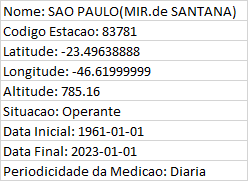

### IMPORTANDO DADOS

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# criando dataframe pandas a partir de dataset baixado
dados = pd.read_csv('..\\data\\dados_83781_D_1961-01-01_2023-01-01.csv', sep=';')
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
22641,28/12/2022,30.1,27.1,21.90,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0


### TRATANDO DADOS

In [3]:
# retirando nan's
columns = dados.columns
for column in columns:
    dados[column] = dados[column].replace(999.90, np.nan)

dados = dados.dropna()
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)"
22641,28/12/2022,30.1,27.1,21.90,19.4
22642,29/12/2022,2.2,27.1,22.06,19.2
22643,30/12/2022,11.7,26.7,21.94,19.2
22644,31/12/2022,0.0,27.1,21.78,18.4
22645,01/01/2023,9.1,27.9,22.66,18.0


In [5]:
# retornando informações pertinentes do dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797 entries, 0 to 22645
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data Medicao                              21797 non-null  object 
 1   PRECIPITACAO TOTAL, DIARIO(mm)            21797 non-null  float64
 2   TEMPERATURA MAXIMA, DIARIA(°C)            21797 non-null  float64
 3   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  21797 non-null  float64
 4   TEMPERATURA MINIMA, DIARIA(°C)            21797 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1021.7+ KB


Para este projeto, optou-se por criar um modelo de previsão das temperaturas maxima, media e minima

In [6]:
# tratamento para padronizar formato de data
dados['Data_Medicao'] = pd.to_datetime(dados['Data Medicao'],format='%d/%m/%Y')

# criando novas colunas com as informações pertinentes
dados['TEMP_MAX'] = dados['TEMPERATURA MAXIMA, DIARIA(°C)']
dados['TEMP_MIN'] = dados['TEMPERATURA MINIMA, DIARIA(°C)']
dados['TEMP_MED'] = dados['TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)']
dados.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN,TEMP_MED
22641,28/12/2022,30.1,27.1,21.90,19.4,2022-12-28,27.1,19.4,21.90
22642,29/12/2022,2.2,27.1,22.06,19.2,2022-12-29,27.1,19.2,22.06
22643,30/12/2022,11.7,26.7,21.94,19.2,2022-12-30,26.7,19.2,21.94
22644,31/12/2022,0.0,27.1,21.78,18.4,2022-12-31,27.1,18.4,21.78
22645,01/01/2023,9.1,27.9,22.66,18.0,2023-01-01,27.9,18.0,22.66


In [8]:
# verificando informações das colunas criadas
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21797 entries, 0 to 22645
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Data Medicao                              21797 non-null  object        
 1   PRECIPITACAO TOTAL, DIARIO(mm)            21797 non-null  float64       
 2   TEMPERATURA MAXIMA, DIARIA(°C)            21797 non-null  float64       
 3   TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)  21797 non-null  float64       
 4   TEMPERATURA MINIMA, DIARIA(°C)            21797 non-null  float64       
 5   Data_Medicao                              21797 non-null  datetime64[ns]
 6   TEMP_MAX                                  21797 non-null  float64       
 7   TEMP_MIN                                  21797 non-null  float64       
 8   TEMP_MED                                  21797 non-null  float64       
dtypes: datetime64[ns](1), float64

In [12]:
## Determinamos que seriam utilizadas series temporaris de 2010 a 2015. 
# Como resultado final, esperamos criar um modelo capaz de prever temperaturas máxima, média e mínima para 2016.

# Criando dataframe com mês e anos alvo
df = dados[(dados['Data_Medicao'].dt.month == 7) & (dados['Data_Medicao'].dt.year >= 2010 ) & (dados['Data_Medicao'].dt.year <= 2015)]
df.tail()

,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)","TEMPERATURA MAXIMA, DIARIA(°C)","TEMPERATURA MEDIA COMPENSADA, DIARIA(°C)","TEMPERATURA MINIMA, DIARIA(°C)",Data_Medicao,TEMP_MAX,TEMP_MIN,TEMP_MED
19930,27/07/2015,0.0,24.2,16.60,11.0,2015-07-27,24.2,11.0,16.60
19931,28/07/2015,0.0,24.5,16.46,11.6,2015-07-28,24.5,11.6,16.46
19932,29/07/2015,0.0,23.8,16.20,11.0,2015-07-29,23.8,11.0,16.20
19933,30/07/2015,0.0,26.7,16.76,11.3,2015-07-30,26.7,11.3,16.76
19934,31/07/2015,0.0,26.6,19.24,12.8,2015-07-31,26.6,12.8,19.24


### ANALISANDO DADOS

Principal referência: https://biangomes.medium.com/s%C3%A9rie-estacion%C3%A1ria-com-dickley-fuller-85cb1d501631

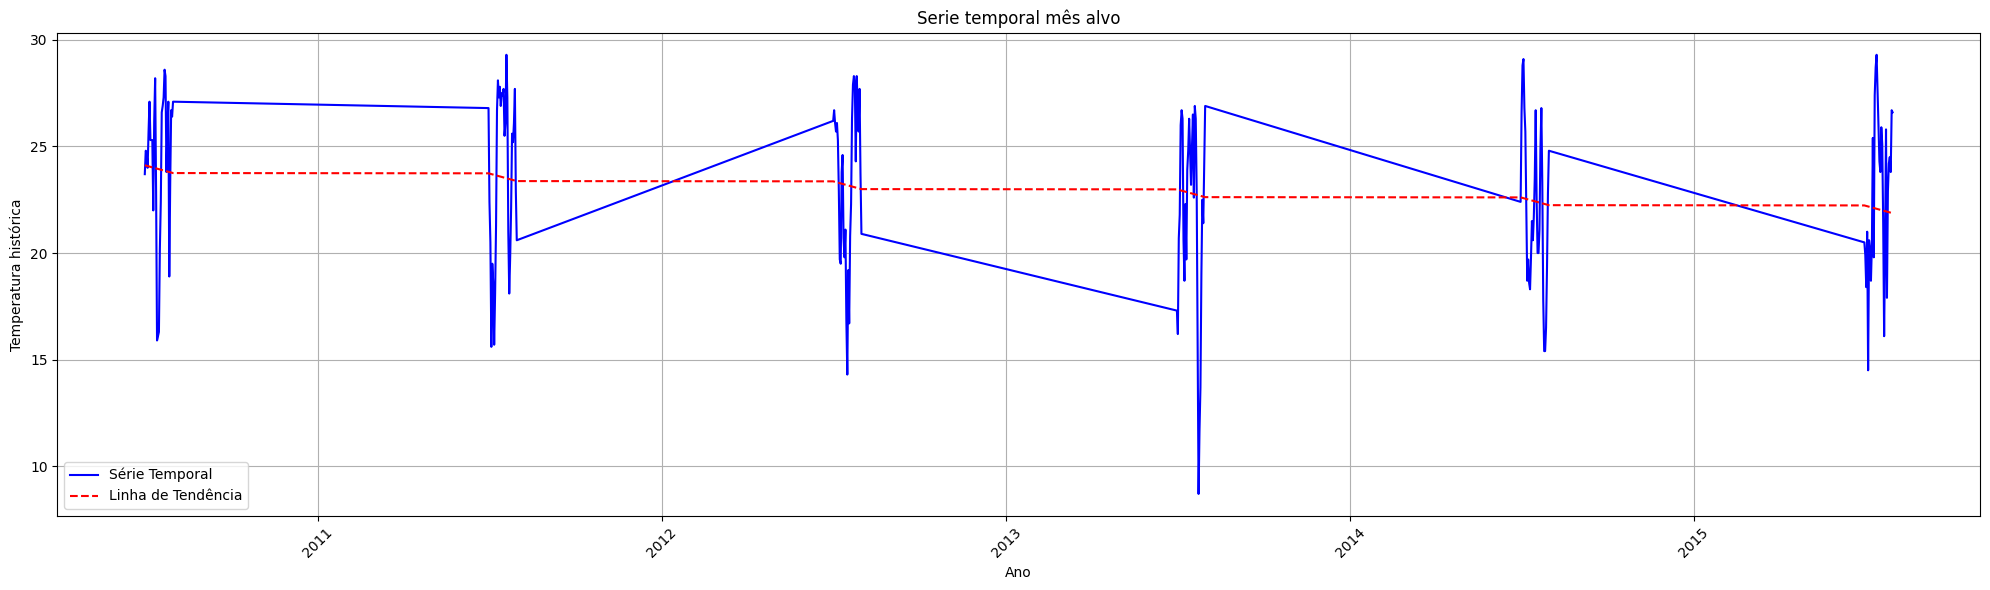

In [23]:
# CRIANDO GRÁFICO PARA MELHOR VISUALIZAÇÃO DA SERIE TEMPORAL

# Ajustando tamanho do gráfico
plt.figure(figsize=(20,6))

# Criando uma linha de tendência para os dados (com base em regressão linear)
x = np.arange(len(df))
y = df['TEMP_MAX']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Plotando a série temporal
plt.plot(df['Data_Medicao'], df['TEMP_MAX'], label='Série Temporal', color='b')

# Plotando a linha de tendência
plt.plot(df['Data_Medicao'], trend_line(x), label='Linha de Tendência', color='r', linestyle='--')

# Configurando rótulos e título
plt.xlabel('Ano')
plt.ylabel('Temperatura histórica')
plt.title('Serie temporal mês alvo')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout() # ajustar automaticamente a disposição dos elementos em um gráfico ou figura para evitar sobreposição
plt.show()

PROPRIEDADES DAS SÉRIES TEMPORAIS

Tendência: Significa saber se uma determinada série está crescendo, diminuindo ou se está estável.
  No presente caso, temos uma leve tendencia de queda na temperatura maxima diária para o mes de julho;

Sazonalidade: São flutuações periódicas, fenômenos que se repetem a cada período idêntico do tempo.

Ciclos: É um aumento ou redução da frequência, mas sem intervalos fixos, o que difere da sazonalidade por não ter um intervalo frequente.

Erro Aleatório: São flutuações inexplicáveis, resultando de fatos fortuitos e inesperados como catastrofes naturais, atentados terroristas e pandemias.

Estacionaridade: Uma série estacionária é quando a média, variância e a estrutura de autocorrelação se mantém constantes durante o tempo.


In [25]:
# teste Dickey-Fuller para verificar a presença de estacionariedade na série
# a decisão de aceitação da hipótese de estacionariedade se dá estabelecido se o valor (p-value) obtido for menor que 0.05.
#  o valor do teste tem que ser menor que o valor crítico para esse mesmo nível de significância
from statsmodels.tsa.stattools import adfuller

test_estacionariedade = adfuller(df['TEMP_MAX'])
output = pd.Series(test_estacionariedade[0:4], index = ['Teste', 'p-valor','Lags','Número de observações usadas'])

for key, value in test_estacionariedade[4].items():
  output['Valor crítico(%s)' %key] = value
print(output)

Teste                          -6.209077e+00
p-valor                         5.564557e-08
Lags                            3.000000e+00
Número de observações usadas    1.820000e+02
Valor crítico(1%)              -3.466800e+00
Valor crítico(5%)              -2.877555e+00
Valor crítico(10%)             -2.575308e+00
dtype: float64


In [27]:
# Verificando valors do teste
print(test_estacionariedade)

(-6.209076671204216, 5.5645567669721196e-08, 3, 182, {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}, 840.7193328703929)


Diante dos valores do Teste e p-value, foi identificado que a série é estacionária.

Com isso, podemos aplicar propriedades de um modelo matemático auto regressivo para representar essa série.

O modelo ARIMA é composto por três parâmetros:

* Auto regressivo (AR): Yt é modelado por seus valores dos tempos anteriores.

* Integração (I): número de diferenciações para tornar a série estacionária.

* Média Móvel (MA): Yt é modelado com os valores do termo de erro dos tempos anteriores.


* P - Ordem da parte auto-regressiva: número de medições necessárias para se prever a próxima
* d - grau de diferenciação: número de vezes que ocorrem as transformações (uso de medições)
* q - ordem da média móvel: valor do erro calculado para a medição anterior

*Os parâmetros p, d e q podem ser identificados pelas funções de autocorrelação*

A função de autocorrelação mede o quão relacionados estão os valores da série em relação aos seus antecedentes, por exemplo, o quanto os dados estão relacionados com os meses anteriores. Assim, as barras que estão dentro dos limites azuis, apresentam correlação igual a zero e fora dessas barras significa que os dados estão correlacionados. Essa função determina o parâmetro ‘q’ - médias móveis.

A função de autocorrelação parcial mede a correlação entre duas observações seriais: yt e yt-k, eliminando-se a dependência dos termos intermediários. Ou seja, na função de autocorrelação parcial mede a correlação entre dois lags(períodos) diferente, já que a autocorrelação que mede isso entre todos os períodos. Ela determina o parâmetro p - auto-regressivo. 

**Identificação de p**

Ambos os gráficos terão o primeiro valor da série como 1. Para saber o quanto de termos AR irá precisar, olhe para o gráfico de ACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de PACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.

**Quantidade de termos em q**

Um processo muito semelhante é feito para saber a quantidade de termos q. Olhe para o gráfico de PACF e veja se o segundo lollipop caiu exponencialmente. Se caiu, olhe para o gŕafico de ACF e conte quantos pirulitos passam o valor crítico (faixa azulada horizontal) antes de retornarem para dentro da faixa.


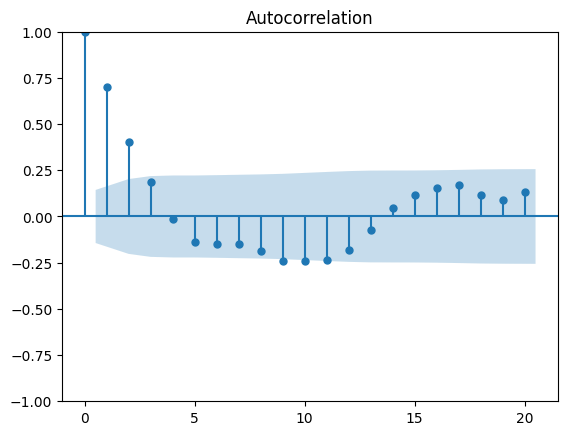

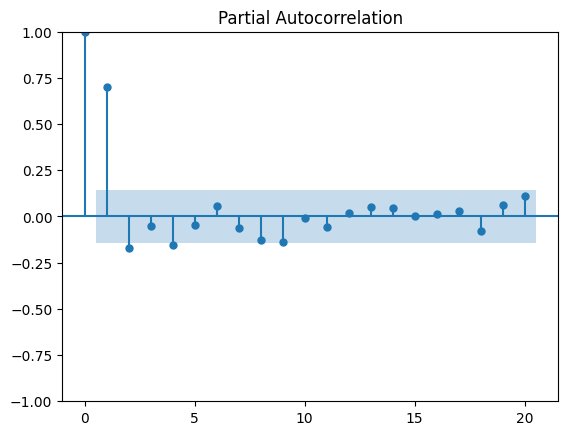

In [39]:
# INICIANDO CRIAÇÃO DO MODELO  DE AUTOREGRESSÃO ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Verificando as funções ACF e PACF
#determinando q
acf = plot_acf(df['TEMP_MAX'], lags = 20)
# determinando p
pacf = plot_pacf(df['TEMP_MAX'], lags = 20)

In [42]:
# treinando modelo ARMA
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
# Modelo Arima
model = sm.tsa.arima.ARIMA(df['TEMP_MAX'], order=(2,0,4))

results_AR = model.fit() #ajustando o modelo

c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gu_gt\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
# print(results_AR.summary())

Para avaliar eventuais falhas no modelo criado, optamos por usar o teste Teste de Box-Ljung. Trata-se de uma ferramenta diagnóstica usada para testar a falha do ajuste de um modelo de série temporal. 

H0 : modelo não exibe falha de ajuste.

H1 : modelo exibe falha de ajuste.

Regra de decisão: Quando (p-value) é > 0,05 aceitamos H0 , ou seja, há evidência de que o modelo não exibe falha de ajuste.

fonte: https://www.bertolo.pro.br/MetodosQuantitativos/Previsao/pmc4481.htm


In [45]:
# teste de LJung-Box utilizado para verificação da autocorrelação residual na etapa de validaçao do modelo

acorr_ljungbox(results_AR.resid, lags=[10], boxpierce= False)

,lb_stat,lb_pvalue
10,4.928352,0.895912


### PREVENDO TEMPERATURA

In [46]:
# previsões para períodos futuros futuras
# entender melhor metodo forecast e predict
forecast = results_AR.predict()

# transformando previsão em dataset
df_max = forecast.to_frame()
df_max = df_max.reset_index()
df_max = df_max.drop('index', axis=1)
df_max

,predicted_mean
0,22.971043
1,23.481650
2,24.342214
3,24.119946
4,23.552455
...,...
181,23.826385
182,23.433303
183,24.672709
184,23.494321


In [47]:
forecast.head()

18078    22.971043
18079    23.481650
18080    24.342214
18081    24.119946
18082    23.552455
Name: predicted_mean, dtype: float64

In [49]:
# Criando a coluna "data" com valores a partir de "01/07/2016"
df_max = df_max.iloc[:31] # retornando os primeiros 31 resultados do predict()
df_max['data'] = pd.date_range(start='2016-07-01', periods=31, freq='D')
df_max.head()

,predicted_mean,data
0,22.971043,2016-07-01
1,23.481650,2016-07-02
2,24.342214,2016-07-03
3,24.119946,2016-07-04
4,23.552455,2016-07-05


In [50]:
# Filtrando as linhas correspondentes ao mês de julho e ano de 2016 do dataset original
df_max_2 = dados.loc[(dados['Data_Medicao'].dt.month == 7) & (dados['Data_Medicao'].dt.year == 2016), ['Data_Medicao', 'TEMP_MAX']]
df_max_2.head()

,Data_Medicao,TEMP_MAX
20270,2016-07-01,24.4
20271,2016-07-02,26.4
20272,2016-07-03,26.4
20273,2016-07-04,26.4
20274,2016-07-05,26.2


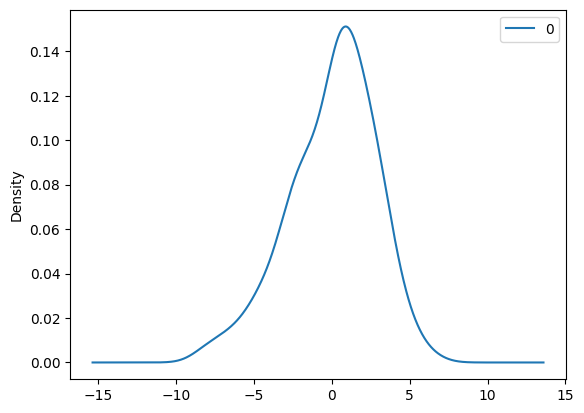

In [51]:
# trazendo os redisuos(erros ao longo do tempo)
from pandas import DataFrame

residuals = DataFrame(results_AR.resid)

residuals.plot(kind='kde') # grafico de densidade: reflete a normalidade dos dados
plt.show()

In [52]:
residuals.describe()

,0
count,186.000000
mean,0.011358
std,2.762932
min,-8.123637
25%,-1.768846
50%,0.455042
75%,1.983391
max,6.350804


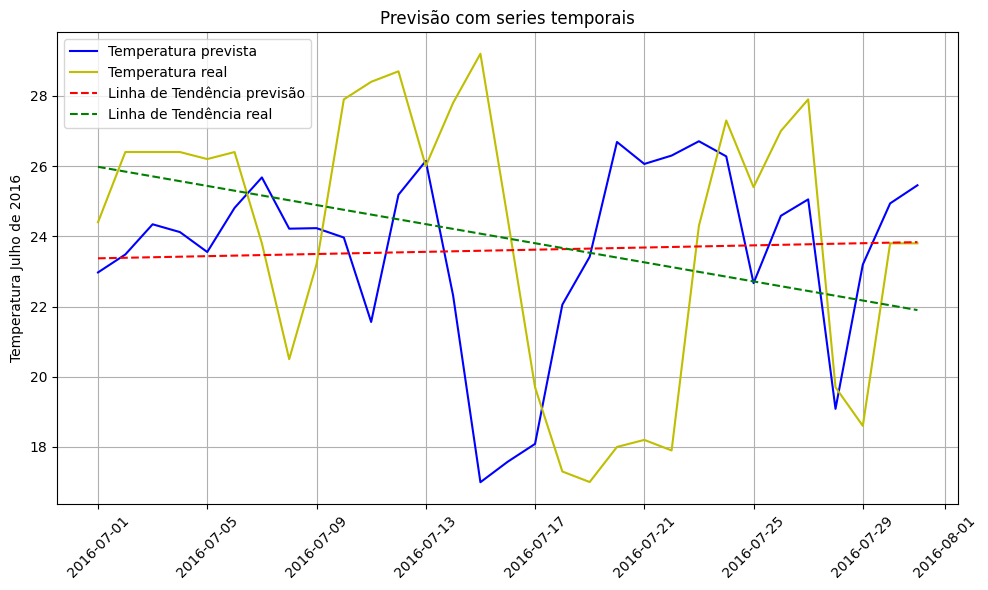

In [53]:
# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Converter a coluna de números inteiros em formato de data
# sp['YEAR'] = pd.to_datetime(sp['YEAR'], format='%Y')

# Ajustar uma linha de tendência (regressão linear) aos dados
x = np.arange(len(df_max))
y = df_max['predicted_mean']
coefficients = np.polyfit(x, y, 1)
trend_line = np.poly1d(coefficients)

# Ajustar uma linha de tendência (regressão linear) aos dados
a = np.arange(len(df_max_2))
b = df_max_2['TEMP_MAX']
coefficientes = np.polyfit(a, b, 1)
trend_line_02 = np.poly1d(coefficientes)

# Plotar a série temporal previsão
plt.plot(df_max['data'], df_max['predicted_mean'], label='Temperatura prevista', color='b')

# Plotar a série temporal real
plt.plot(df_max_2['Data_Medicao'], df_max_2['TEMP_MAX'], label='Temperatura real', color='y')

# Plotar a linha de tendência previsão
plt.plot(df_max['data'], trend_line(x), label='Linha de Tendência previsão', color='r', linestyle='--')

# Plotar a linha de tendência real
plt.plot(df_max_2['Data_Medicao'], trend_line_02(a), label='Linha de Tendência real', color='g', linestyle='--')


# Configurar rótulos e título
plt.ylabel('Temperatura Julho de 2016')
plt.title('Previsão com series temporais')



# Mostrar a legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.grid(True)
plt.tight_layout()
plt.show()